In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('/content/Battery_RUL.csv')
print(data.head())

   Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0          1.0             2595.30             1151.488500   
1          2.0             7408.64             1172.512500   
2          3.0             7393.76             1112.992000   
3          4.0             7385.50             1080.320667   
4          6.0            65022.75            29813.487000   

   Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
0                      3.670                    3.211           5460.001   
1                      4.246                    3.220           5508.992   
2                      4.249                    3.224           5508.993   
3                      4.250                    3.225           5502.016   
4                      4.290                    3.398           5480.992   

   Time constant current (s)  Charging time (s)   RUL  
0                    6755.01           10777.82  1112  
1                    6762.02           10500.35  1111  
2 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [ ]:
data.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


In [ ]:
data.isnull().sum()

Cycle_Index                  0
Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant current (s)    0
Charging time (s)            0
RUL                          0
dtype: int64

In [ ]:
# Split the data into features and target variable
X = data.drop(columns=['RUL'])
y = data['RUL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)
print(X_train.head())

       Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
8007         480.0             1620.00              474.000000   
12443        605.0             1511.45              389.142857   
14219        211.0             1974.88              650.400000   
14984       1033.0              844.03              211.500000   
2330         177.0             2035.09              702.000000   

       Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
8007                       3.947                    3.536           3212.351   
12443                      3.863                    3.607           2729.889   
14219                      3.978                    3.461           4334.383   
14984                      3.790                    3.729           1068.344   
2330                       3.990                    3.436           4502.328   

       Time constant current (s)  Charging time (s)  
8007                     4076.35            8108.35  
12443         

In [ ]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(lr_pred)
lr_rmse = mean_squared_error(y_test, lr_pred, squared=False)

print(f'Linear Regression RMSE: {lr_rmse}')

[263.41436531 495.27626607 781.26857433 ... 423.26423307 246.41055692
 536.30282418]
Linear Regression RMSE: 7.148265361686873


In [ ]:
# Random Forest Regressor

rf = RandomForestRegressor(n_estimators=100, random_state=17)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)

print(f'Random Forest Regressor RMSE: {rf_rmse}')

[262.18 494.   778.92 ... 420.94 247.65 536.61]
Random Forest Regressor RMSE: 3.8890412063161244


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# AdaBoost Regressor
ada = AdaBoostRegressor(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
print(ada_pred)
ada_rmse = mean_squared_error(y_test, ada_pred, squared=False)

print(f'AdaBoost Regressor RMSE: {ada_rmse}')

[249.98445596 492.02037846 773.51721311 ... 428.78976109 232.56622024
 517.80096618]
AdaBoost Regressor RMSE: 14.529587388767622


In [ ]:
from xgboost import XGBRegressor

# XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print(xgb_pred)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)

print(f'XGBoost Regressor RMSE: {xgb_rmse}')

[260.85464 493.16696 778.4201  ... 421.98395 249.09209 539.17505]
XGBoost Regressor RMSE: 4.02169907234195


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd

In [ ]:
# Ridge Regression
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print(ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

print(f'Ridge Regression MSE: {ridge_mse}')

[263.41299264 495.27924458 781.27150761 ... 423.26773139 246.4095021
 536.30374276]
Ridge Regression MSE: 51.09696345451834


In [ ]:
# Lasso Regression
lasso = Lasso(alpha=1.0, random_state=42)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print(lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print(f'Lasso Regression MSE: {lasso_mse}')

[263.37459529 495.35618139 781.34445377 ... 423.35875936 246.37379566
 536.34491017]
Lasso Regression MSE: 51.08796294778203


In [ ]:
models = {
    'Linear Regression': lr_rmse,
    'Random Forest Regressor': rf_rmse,
    'AdaBoost Regressor': ada_rmse,
    'XGBoost Regressor': xgb_rmse,
    'Ridge Regression MSE': ridge_mse,
    'Lasso Regression MSE': lasso_mse
}

best_model_name = min(models, key=models.get)
best_model_rmse = models[best_model_name]

print(f'Best Model: {best_model_name}')
print(f'RMSE: {best_model_rmse}')


Best Model: Random Forest Regressor
RMSE: 3.8890412063161244


In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared for each model
lr_r2 = r2_score(y_test, lr_pred)
rf_r2 = r2_score(y_test, rf_pred)
ada_r2 = r2_score(y_test, ada_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

# Display R-squared values
print(f'Linear Regression R-squared: {lr_r2}')
print(f'Random Forest Regressor R-squared: {rf_r2}')
print(f'AdaBoost Regressor R-squared: {ada_r2}')
print(f'XGBoost Regressor R-squared: {xgb_r2}')
print(f'Lasso Regression MSE: {lasso_r2}')
print(f'Ridge Regression MSE: {ridge_r2}')

Linear Regression R-squared: 0.9995152438299697
Random Forest Regressor R-squared: 0.9998565148016154
AdaBoost Regressor R-squared: 0.9979972415360426
XGBoost Regressor R-squared: 0.999846559093712
Lasso Regression MSE: 0.99951533618192
Ridge Regression MSE: 0.9995152507954668


In [ ]:
print(f'Linear Regression RMSE: {lr_rmse}')
print(f'Random Forest Regressor RMSE: {rf_rmse}')
print(f'AdaBoost Regressor RMSE: {ada_rmse}')
print(f'XGBoost Regressor RMSE: {xgb_rmse}')
print(f'Lasso Regression RMSE: {lasso_mse}')
print(f'Ridge Regression RMSE: {ridge_mse}')

Linear Regression RMSE: 7.148265361686873
Random Forest Regressor RMSE: 3.8890412063161244
AdaBoost Regressor RMSE: 14.529587388767622
XGBoost Regressor RMSE: 4.02169907234195
Lasso Regression RMSE: 51.08796294778203
Ridge Regression RMSE: 51.09696345451834


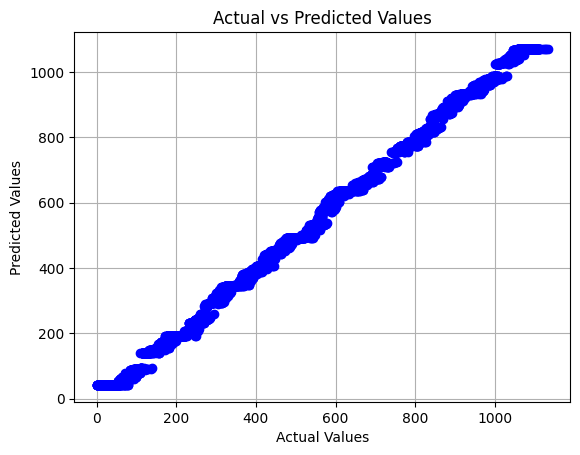

In [ ]:
import matplotlib.pyplot as plt

# Example actual target values and predicted values
actual_values = y_test
predicted_values = ada_pred

# Plotting
plt.plot(actual_values, predicted_values, 'bo')  # 'bo' for blue circles
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data.count()

Cycle_Index                  15064
Discharge Time (s)           15064
Decrement 3.6-3.4V (s)       15064
Max. Voltage Dischar. (V)    15064
Min. Voltage Charg. (V)      15064
Time at 4.15V (s)            15064
Time constant current (s)    15064
Charging time (s)            15064
RUL                          15064
dtype: int64

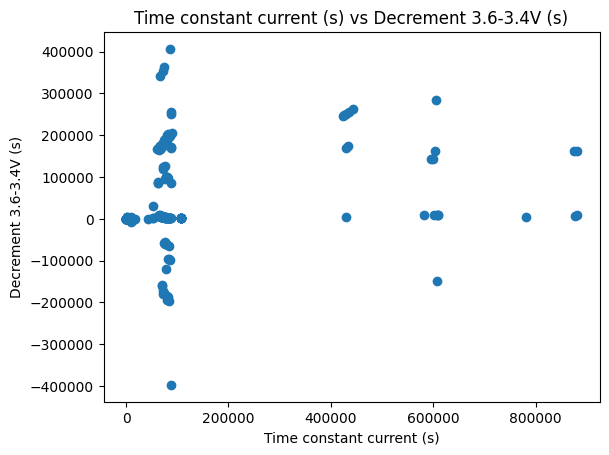

In [ ]:
# Assuming the dataset has columns like 'cycle' and 'RUL'
# Replace 'cycle' and 'RUL' with actual column names from your dataset
cycle = data['Time constant current (s)']
rul = data['Decrement 3.6-3.4V (s)']

# Plotting
plt.scatter(cycle, rul)
plt.xlabel('Time constant current (s)')
plt.ylabel('Decrement 3.6-3.4V (s)')
plt.title('Time constant current (s) vs Decrement 3.6-3.4V (s)')
plt.grid(False)
plt.show()


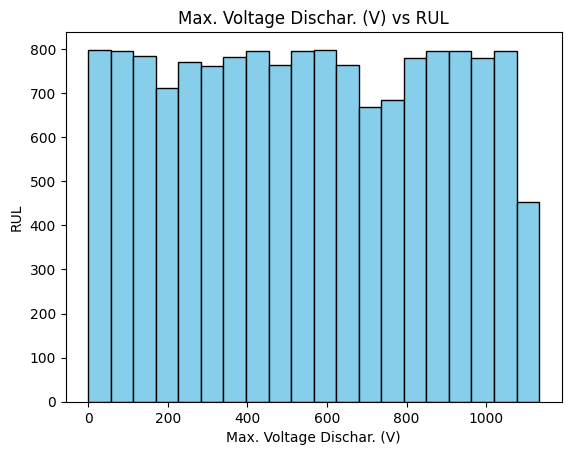

In [ ]:
cycle = data['Max. Voltage Dischar. (V)']
rul = data['RUL']

# Plotting
plt.hist(rul, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Max. Voltage Dischar. (V)')
plt.ylabel('RUL')
plt.title('Max. Voltage Dischar. (V) vs RUL')
plt.grid(False)
plt.show()


<Axes: >

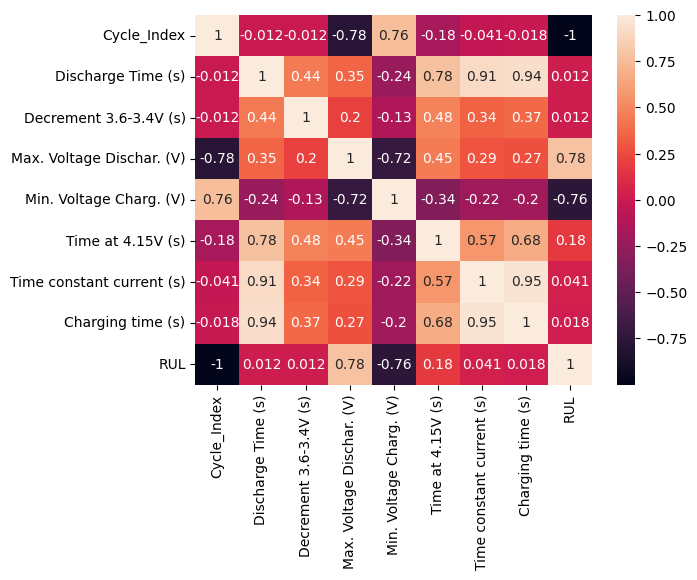

In [ ]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, annot=True)


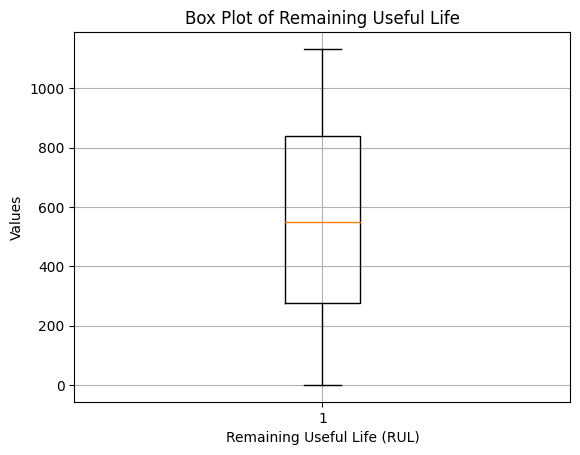

In [ ]:
rul = data['RUL']

# Plotting
plt.boxplot(rul)
plt.xlabel('Remaining Useful Life (RUL)')
plt.ylabel('Values')
plt.title('Box Plot of Remaining Useful Life')
plt.grid(True)
plt.show()